In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

receptor_results = pd.read_csv("results/receptor_results.csv")
emisor_results = pd.read_csv("tests/emisor_data.csv")

In [14]:
print("=== ANÁLISIS DE ALGORITMOS DE DETECCIÓN Y CORRECCIÓN DE ERRORES ===\n")

print(" DATOS DEL EMISOR:")
print(f"Total de pruebas: {len(emisor_results)}")
print(f"Algoritmos: {emisor_results['algorithm'].unique()}")
print(f"Tamaños de datos: {sorted(emisor_results['dataSize'].unique())}")
print(f"Probabilidades de error: {sorted(emisor_results['errorProbability'].unique())}")

print("\n DATOS DEL RECEPTOR:")
print(f"Total de pruebas: {len(receptor_results)}")
print(f"Algoritmos: {receptor_results['algorithm'].unique()}")
print(f"Detecciones correctas: {receptor_results['correctDetection'].sum()}")
print(f"Correcciones exitosas: {receptor_results['corrected'].sum()}")

# Mostrar primeras filas
print("\n Muestra de datos del receptor:")
print(receptor_results.head())

=== ANÁLISIS DE ALGORITMOS DE DETECCIÓN Y CORRECCIÓN DE ERRORES ===

 DATOS DEL EMISOR:
Total de pruebas: 5000
Algoritmos: ['hamming' 'fletcher16']
Tamaños de datos: [np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(512)]
Probabilidades de error: [np.float64(0.0), np.float64(0.01), np.float64(0.02), np.float64(0.05), np.float64(0.1)]

 DATOS DEL RECEPTOR:
Total de pruebas: 5000
Algoritmos: ['hamming' 'fletcher16']
Detecciones correctas: 3413
Correcciones exitosas: 2326

 Muestra de datos del receptor:
   testId algorithm  dataSize  errorProbability originalText  \
0       1   hamming        32               0.0         BHQi   
1       2   hamming        32               0.0         S pp   
2       3   hamming        32               0.0         DDyw   
3       4   hamming        32               0.0         kMI1   
4       5   hamming        32               0.0         JTqy   

                       originalBits                              encodedBits  \
0  0100001

Análisis de efectividad por algoritmo

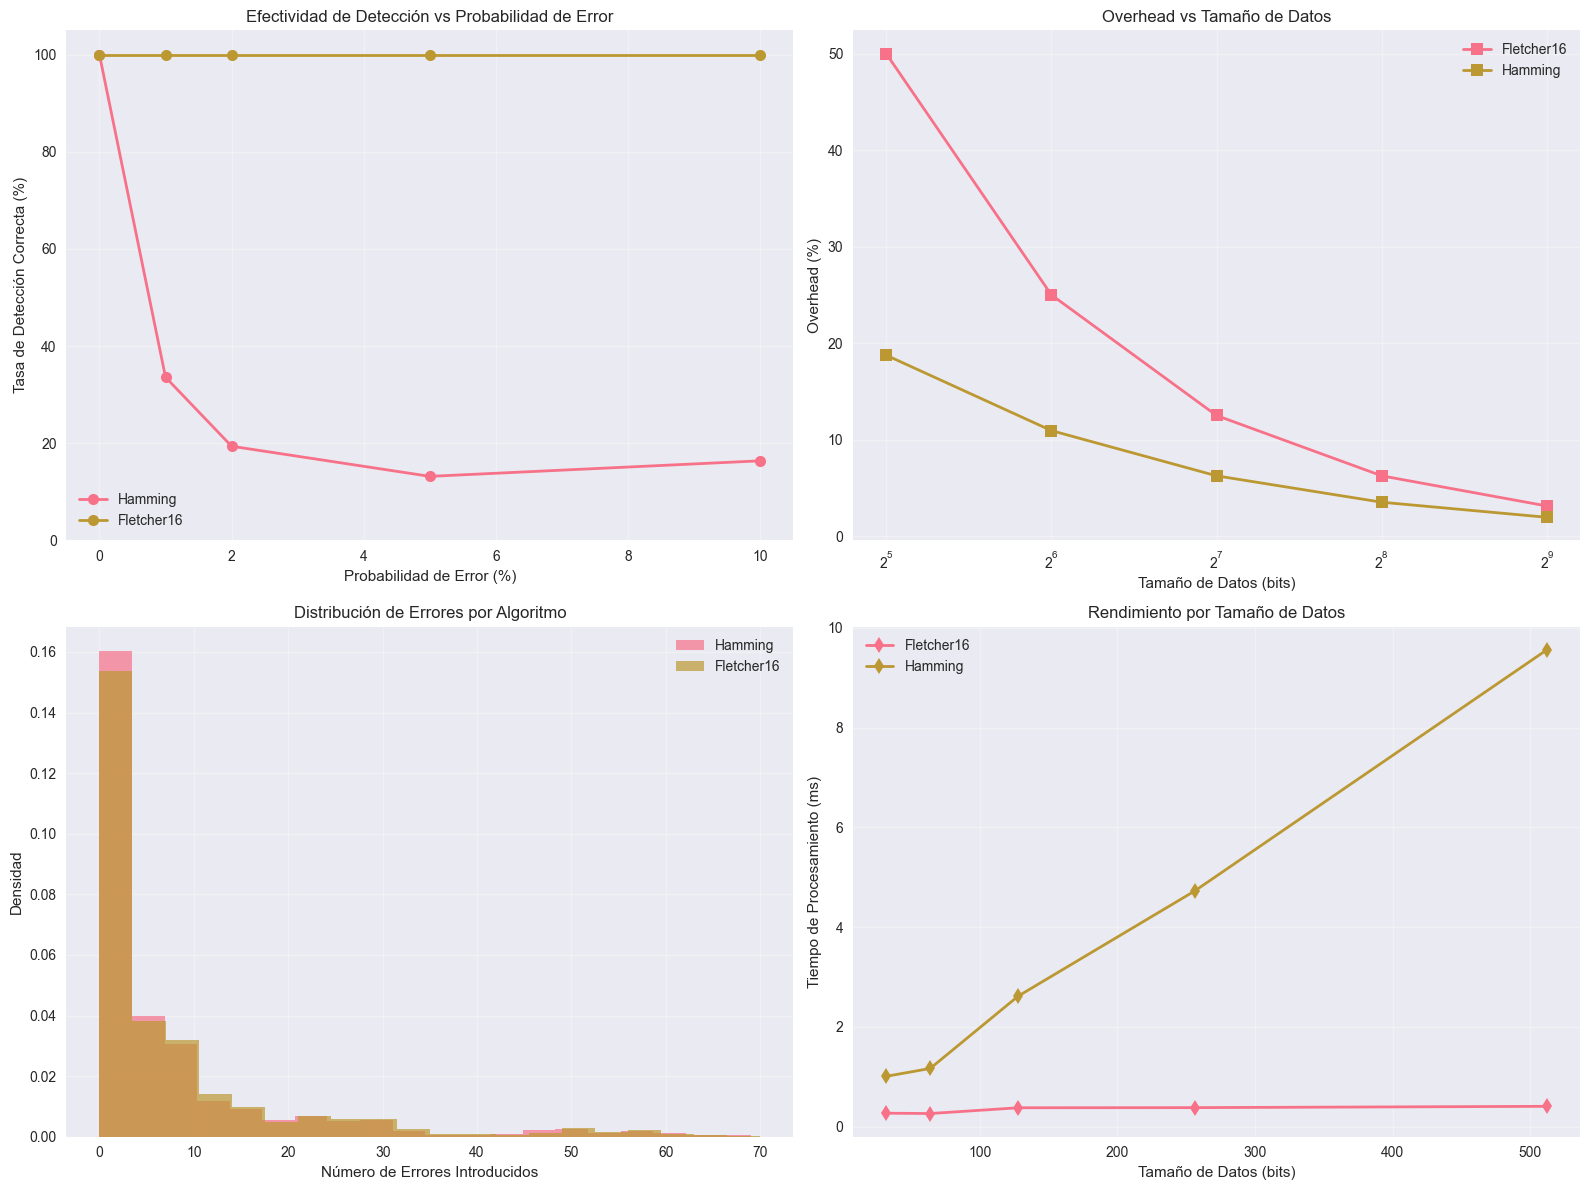

In [15]:
# Configurar estilo de gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Análisis de efectividad por algoritmo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Tasa de detección correcta por algoritmo y probabilidad de error
for i, algorithm in enumerate(receptor_results['algorithm'].unique()):
    algo_data = receptor_results[receptor_results['algorithm'] == algorithm]
    detection_rates = algo_data.groupby('errorProbability')['correctDetection'].mean()
    
    axes[0, 0].plot(detection_rates.index * 100, detection_rates.values * 100, 
                    marker='o', linewidth=2, markersize=8, label=f'{algorithm.title()}')

axes[0, 0].set_xlabel('Probabilidad de Error (%)')
axes[0, 0].set_ylabel('Tasa de Detección Correcta (%)')
axes[0, 0].set_title('Efectividad de Detección vs Probabilidad de Error')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, 105)

# 2. Análisis de overhead por tamaño
overhead_analysis = emisor_results.groupby(['algorithm', 'dataSize'])['overhead'].first().reset_index()

for algorithm in overhead_analysis['algorithm'].unique():
    algo_overhead = overhead_analysis[overhead_analysis['algorithm'] == algorithm]
    axes[0, 1].plot(algo_overhead['dataSize'], algo_overhead['overhead'] * 100, 
                    marker='s', linewidth=2, markersize=8, label=f'{algorithm.title()}')

axes[0, 1].set_xlabel('Tamaño de Datos (bits)')
axes[0, 1].set_ylabel('Overhead (%)')
axes[0, 1].set_title('Overhead vs Tamaño de Datos')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xscale('log', base=2)

# 3. Distribución de errores introducidos
for algorithm in emisor_results['algorithm'].unique():
    algo_data = emisor_results[emisor_results['algorithm'] == algorithm]
    axes[1, 0].hist(algo_data['errorsIntroduced'], bins=20, alpha=0.7, 
                    label=f'{algorithm.title()}', density=True)

axes[1, 0].set_xlabel('Número de Errores Introducidos')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].set_title('Distribución de Errores por Algoritmo')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Tiempo de procesamiento
processing_times = receptor_results.groupby(['algorithm', 'dataSize'])['processingTime'].mean().reset_index()

for algorithm in processing_times['algorithm'].unique():
    algo_times = processing_times[processing_times['algorithm'] == algorithm]
    axes[1, 1].plot(algo_times['dataSize'], algo_times['processingTime'], 
                    marker='d', linewidth=2, markersize=8, label=f'{algorithm.title()}')

axes[1, 1].set_xlabel('Tamaño de Datos (bits)')
axes[1, 1].set_ylabel('Tiempo de Procesamiento (ms)')
axes[1, 1].set_title('Rendimiento por Tamaño de Datos')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Analisis estadistico

In [17]:
# Análisis estadístico por algoritmo
print(" ANÁLISIS ESTADÍSTICO DETALLADO")
print("=" * 50)

for algorithm in receptor_results['algorithm'].unique():
    algo_data = receptor_results[receptor_results['algorithm'] == algorithm]
    emisor_algo = emisor_results[emisor_results['algorithm'] == algorithm]
    
    print(f"\n {algorithm.upper()}:")
    print(f"   Total de pruebas: {len(algo_data)}")
    
    # Estadísticas de detección
    detection_rate = algo_data['correctDetection'].mean()
    print(f"   Tasa de detección correcta: {detection_rate*100:.1f}%")
    
    # Estadísticas de corrección (solo para algoritmos que corrigen)
    if algo_data['corrected'].any():
        correction_rate = algo_data['corrected'].mean()
        print(f"   Tasa de corrección: {correction_rate*100:.1f}%")
    
    # Tiempo promedio
    avg_time = algo_data['processingTime'].mean()
    print(f"   Tiempo promedio: {avg_time:.3f} ms")
    
    # Overhead promedio
    avg_overhead = emisor_algo['overhead'].mean()
    print(f"   Overhead promedio: {avg_overhead*100:.2f}%")
    
    # Análisis por probabilidad de error
    print(f"\n Rendimiento por probabilidad de error:")
    for error_prob in sorted(algo_data['errorProbability'].unique()):
        prob_data = algo_data[algo_data['errorProbability'] == error_prob]
        detection_rate_prob = prob_data['correctDetection'].mean()
        print(f"      {error_prob*100:4.1f}%: {detection_rate_prob*100:5.1f}% detección correcta")

# Matriz de confusión para cada algoritmo
print(f"\n MATRIZ DE CONFUSIÓN")
print("=" * 30)

for algorithm in receptor_results['algorithm'].unique():
    algo_data = receptor_results[receptor_results['algorithm'] == algorithm]
    
    # Calcular métricas de confusión
    tp = len(algo_data[(algo_data['errorsIntroduced'] > 0) & (algo_data['detected'] == True)])
    fn = len(algo_data[(algo_data['errorsIntroduced'] > 0) & (algo_data['detected'] == False)])
    tn = len(algo_data[(algo_data['errorsIntroduced'] == 0) & (algo_data['detected'] == False)])
    fp = len(algo_data[(algo_data['errorsIntroduced'] == 0) & (algo_data['detected'] == True)])
    
    print(f"\n{algorithm.upper()}:")
    print(f"   Verdaderos Positivos (TP): {tp}")
    print(f"   Falsos Negativos (FN): {fn}")
    print(f"   Verdaderos Negativos (TN): {tn}")
    print(f"   Falsos Positivos (FP): {fp}")
    
    # Métricas derivadas
    if tp + fn > 0:
        sensitivity = tp / (tp + fn)
        print(f"   Sensibilidad (Recall): {sensitivity*100:.1f}%")
    
    if tn + fp > 0:
        specificity = tn / (tn + fp)
        print(f"   Especificidad: {specificity*100:.1f}%")

 ANÁLISIS ESTADÍSTICO DETALLADO

 HAMMING:
   Total de pruebas: 2500
   Tasa de detección correcta: 36.5%
   Tasa de corrección: 93.0%
   Tiempo promedio: 3.814 ms
   Overhead promedio: 8.28%

 Rendimiento por probabilidad de error:
       0.0%: 100.0% detección correcta
       1.0%:  33.6% detección correcta
       2.0%:  19.4% detección correcta
       5.0%:  13.2% detección correcta
      10.0%:  16.4% detección correcta

 FLETCHER16:
   Total de pruebas: 2500
   Tasa de detección correcta: 100.0%
   Tiempo promedio: 0.338 ms
   Overhead promedio: 19.38%

 Rendimiento por probabilidad de error:
       0.0%: 100.0% detección correcta
       1.0%: 100.0% detección correcta
       2.0%: 100.0% detección correcta
       5.0%: 100.0% detección correcta
      10.0%: 100.0% detección correcta

 MATRIZ DE CONFUSIÓN

HAMMING:
   Verdaderos Positivos (TP): 174
   Falsos Negativos (FN): 1587
   Verdaderos Negativos (TN): 739
   Falsos Positivos (FP): 0
   Sensibilidad (Recall): 9.9%
   Especif

In [ ]:
# Mapas de calor de rendimiento
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

algorithms = receptor_results['algorithm'].unique()

for i, algorithm in enumerate(algorithms):
    algo_data = receptor_results[receptor_results['algorithm'] == algorithm]
    
    # Crear pivot table para el mapa de calor
    heatmap_data = algo_data.pivot_table(
        values='correctDetection', 
        index='errorProbability', 
        columns='dataSize', 
        aggfunc='mean'
    )
    
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn', 
                ax=axes[i], cbar_kws={'label': 'Tasa de Detección Correcta'})
    axes[i].set_title(f'{algorithm.title()} - Rendimiento por Configuración')
    axes[i].set_xlabel('Tamaño de Datos (bits)')
    axes[i].set_ylabel('Probabilidad de Error')

plt.tight_layout()
plt.show()

# Análisis de correlaciones
print("\n MATRIZ DE CORRELACIONES")
print("=" * 30)

# Seleccionar variables numéricas para correlación
numeric_cols = ['dataSize', 'errorProbability', 'errorsIntroduced', 
                'correctDetection', 'corrected', 'processingTime', 'overhead']

correlation_matrix = receptor_results[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlaciones - Variables del Sistema')
plt.tight_layout()
plt.show()

print("\nCorrelaciones más significativas:")
# Encontrar correlaciones altas (excluyendo diagonal)
mask = np.triu(np.ones_like(correlation_matrix))
correlation_matrix_masked = correlation_matrix.mask(mask)

for col in correlation_matrix_masked.columns:
    for idx in correlation_matrix_masked.index:
        corr_val = correlation_matrix_masked.loc[idx, col]
        if pd.notna(corr_val) and abs(corr_val) > 0.3:
            print(f"   {idx} ↔ {col}: {corr_val:.3f}")